In [1]:
import pandas as pd  
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
         'axes.labelsize': 19,
         'axes.titlesize':23,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [3]:
def set_labels(title, xlabel="", ylabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [4]:
dfIN = pd.read_csv("INpreprocessed.csv")
dfGB = pd.read_csv("GBpreprocessed.csv")
dfUS = pd.read_csv("USpreprocessed.csv")
dfs = [dfIN,dfGB,dfUS]

In [5]:
dfIN.isnull().sum()

video_id                    0
title                       0
channel_title               0
category_id                 0
views                       0
likes                       0
dislikes                    0
comment_count               0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               250
trend_date                  0
trend_month                 0
trend_year                  0
pub_date                    0
pub_month                   0
pub_year                    0
pub_hour                    0
file_path                   0
dtype: int64

In [6]:
dfIN.describe()

,category_id,views,likes,dislikes,comment_count,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour
count,30098.000000,3.009800e+04,3.009800e+04,3.009800e+04,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000,30098.000000
mean,21.408997,1.182208e+06,3.190725e+04,1.921989e+03,3159.406705,5.283341,15.858462,17.766131,15.775168,5.344873,17.755432,10.616586
std,6.749239,3.475862e+06,1.066138e+05,1.788343e+04,16457.743049,3.795210,8.809644,0.423297,8.765619,3.831658,0.429838,5.044901
min,1.000000,4.287000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,17.000000,0.000000
25%,23.000000,1.369780e+05,1.131000e+03,1.300000e+02,112.000000,2.000000,8.000000,18.000000,8.000000,2.000000,18.000000,6.000000
50%,24.000000,3.378320e+05,4.066000e+03,3.850000e+02,435.000000,4.000000,16.000000,18.000000,16.000000,4.000000,18.000000,11.000000
75%,24.000000,8.799642e+05,1.856925e+04,1.163000e+03,1603.000000,6.000000,23.000000,18.000000,23.000000,6.000000,18.000000,14.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,12.000000,31.000000,18.000000,31.000000,12.000000,18.000000,23.000000


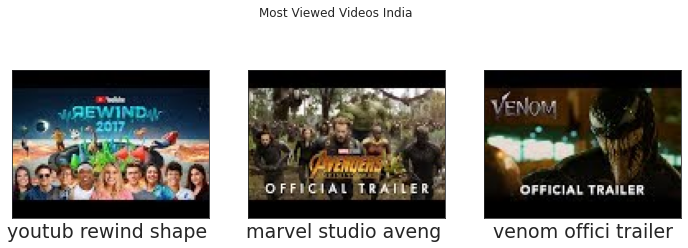

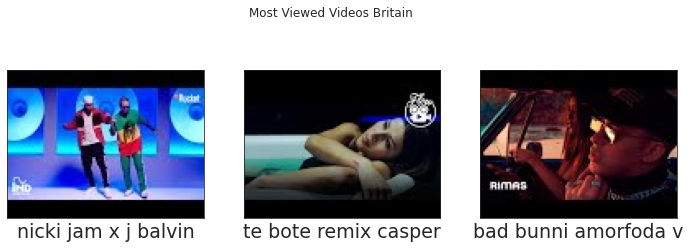

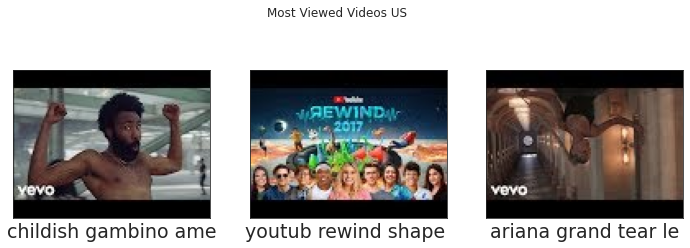

In [7]:
sns.set_style("white")
import matplotlib.image as mpimg
from PIL import Image
import requests
from io import BytesIO

countries = ["India","Britain","US"]

for j,(df,country) in enumerate(zip(dfs,countries)):
    view_df = df.sort_values(by='views',ascending=True,ignore_index=True)
    view_df = view_df.drop_duplicates(subset = 'video_id',keep='last',ignore_index=True)
    view_df = view_df.sort_values(by='views',ascending=False,ignore_index=True)

    fig,ax = plt.subplots(1,3,figsize=(12,4))
    #since local images are available for India
    if j==0:
        for i in range(3):
            img = mpimg.imread(view_df.file_path[i].replace("https://raw.githubusercontent.com/sheelfshah/iitb_ds203_project/master/",""))
            mpimg.imsave('results/{}most_trending.png'.format(i),img)
            ax[i].imshow(img)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(view_df.title[i][:20])
    
    else:
        for i in range(3):
            url = view_df.thumbnail_link[i]
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            ax[i].imshow(img)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_xlabel(view_df.title[i][:20])

    
    fig.suptitle("Most Viewed Videos "+country)
    plt.show()

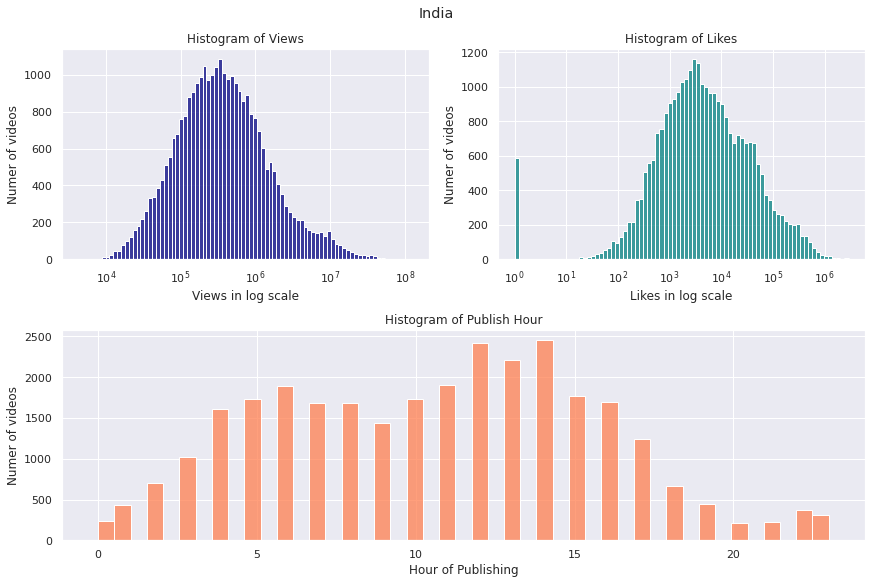

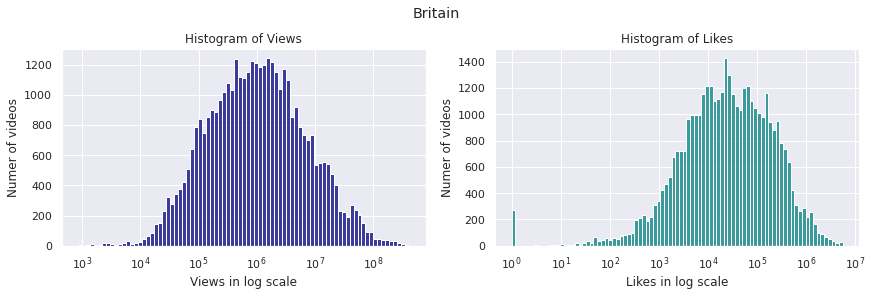

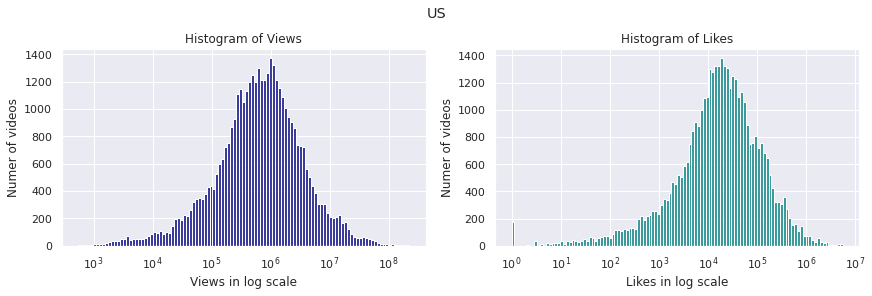

In [8]:
sns.set_theme()

for i,(df,country) in enumerate(zip(dfs,countries)):
    

    if i==0:
        fig = plt.figure(constrained_layout = True)
        gs = fig.add_gridspec(2,2)
    else:
        fig = plt.figure(figsize=(12,4),constrained_layout = True)
        gs = fig.add_gridspec(1,2)
    fax1 = fig.add_subplot(gs[0,0])
    sns.histplot(df['views'], log_scale=True,ax = fax1,color = 'navy')
    fax1.set_title("Histogram of Views")
    fax1.set_xlabel("Views in log scale")
    fax1.set_ylabel("Numer of videos")
    #set_labels("Histogram of views", "Views", "Number of videos")

    fax2 = fig.add_subplot(gs[0,1])
    sns.histplot(df['likes'] + 1, log_scale=True,ax = fax2,color='teal')
    fax2.set_title("Histogram of Likes")
    fax2.set_xlabel("Likes in log scale")
    fax2.set_ylabel("Numer of videos")
    
    if i==0:
        fax3 = fig.add_subplot(gs[1,:])
        sns.histplot(df['pub_hour'],ax = fax3,color = 'coral')
        fax3.set_title("Histogram of Publish Hour")
        fax3.set_xlabel("Hour of Publishing")
        fax3.set_ylabel("Numer of videos")
    
    fig.suptitle(country)
    plt.savefig("results/"+str(country+" views and likes.png"))
    plt.show()

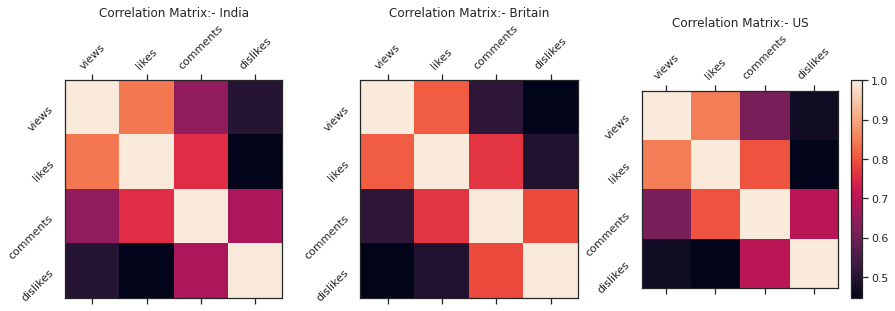

In [9]:
#finding the corelation between views, likes, dislikes, and comments
sns.set_style("white")
fig,ax = plt.subplots(1,3,figsize=(15,4))

for i,(df,country) in enumerate(zip(dfs,countries)):
   
    corr_df = df[['views','likes','comment_count','dislikes']]
    corr = corr_df.corr()
    im = ax[i].matshow(corr)
    ax[i].set_xticks(range(4))
    ax[i].set_xticklabels(['views','likes','comments','dislikes'],rotation=45)
    ax[i].set_yticks(range(4))
    ax[i].set_yticklabels(['views','likes','comments','dislikes'],rotation=45)
    ax[i].set_title("Correlation Matrix:- "+country)
    
fig.colorbar(im)    

#extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('results/correlation.png')

plt.show()

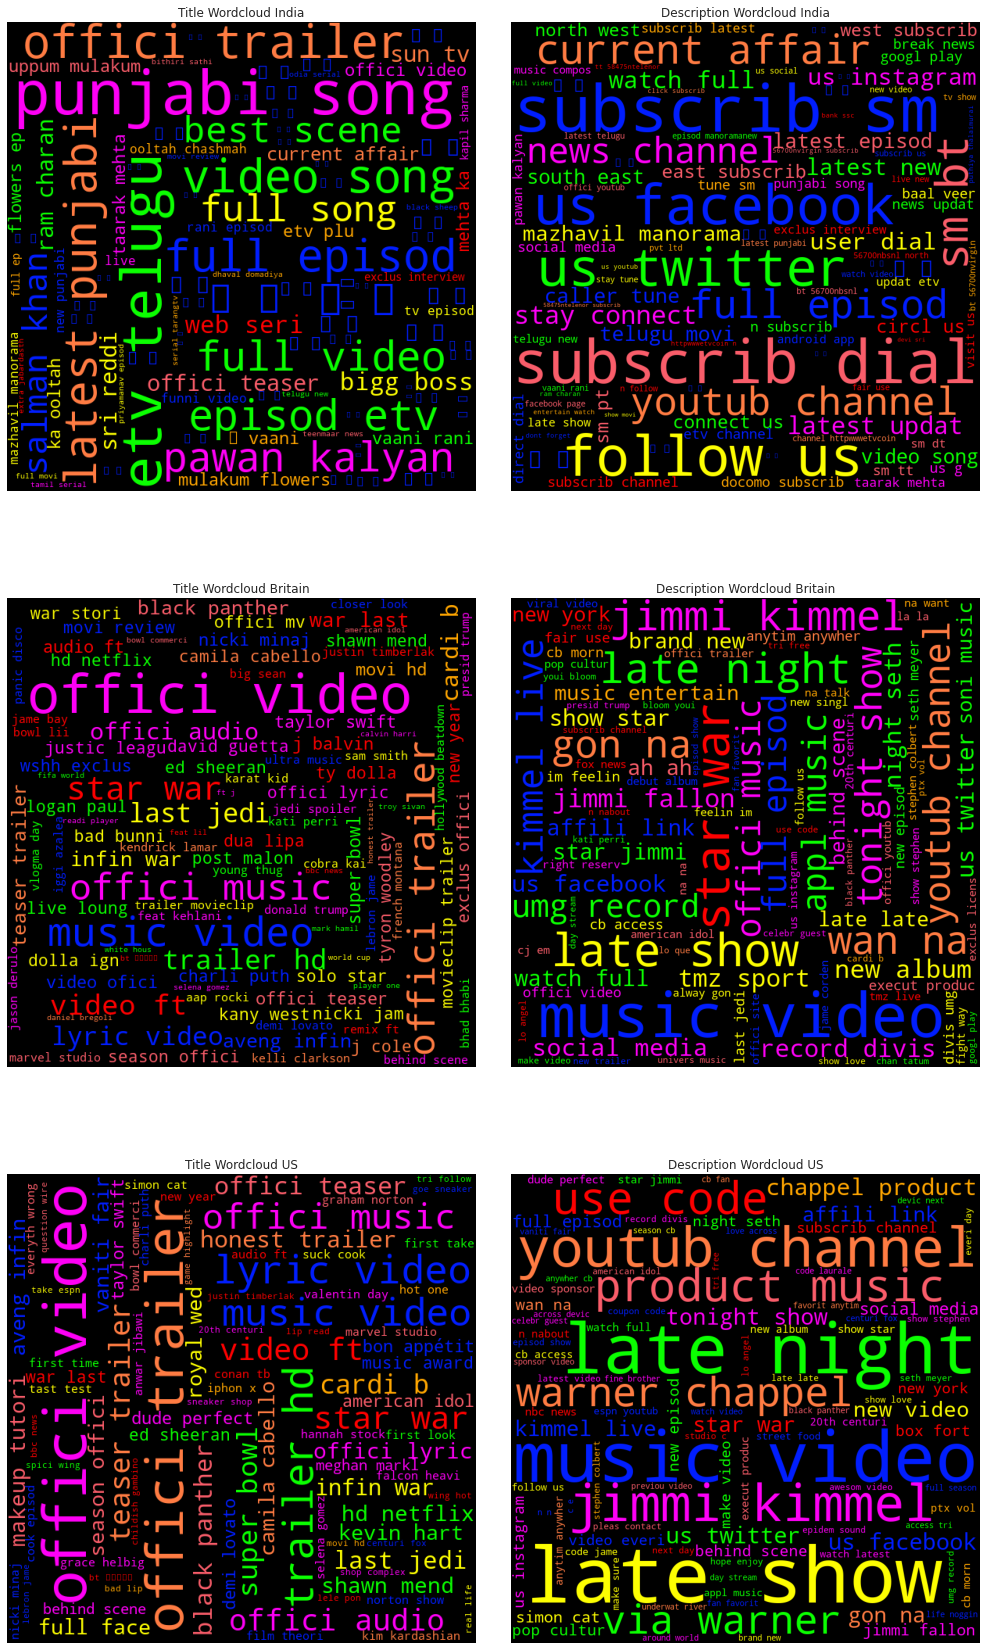

In [10]:
def col_func(word, font_size, position, orientation, font_path, random_state):
    colors = ["#fe0000", "#fdfe02", "#0bff01", "#011efe", "#fe00f6", "#f95d6a", "#ff7c43", "#ffa600"]
    return colors[len(word)%len(colors)]

fig,ax = plt.subplots(3,2,figsize=(14,24))
plt.axis("off") 
plt.tight_layout(pad = 0) 
for i,(df,country) in enumerate(zip(dfs,countries)):
    title  = df['title']
    desc = df['description']
    comment_words = '' 
    desc_words = ''
    stopwords = set(STOPWORDS) 

    for val in title: 

        val = str(val) 
        tokens = val.split() 

        comment_words += " ".join(tokens)+" "
    for val in desc:
        val = str(val) 
        tokens = val.split() 
        desc_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 600, height = 600, 
                        stopwords = stopwords, 
                        min_font_size = 10, background_color="#000000",
                        color_func=col_func, max_words=100).generate(comment_words) 
    #mpimg.imsave('results/'+country+'title.png',wordcloud)
    wordcloud1 = WordCloud(width = 800, height = 800, 
                        stopwords = stopwords, 
                        min_font_size = 10, background_color="#000000",
                        color_func=col_func, max_words=100).generate(desc_words) 
    #mpimg.imsave('results/'+country+'desc.png',wordcloud1)

    #plt.figure(figsize = (8, 8), facecolor = None) 
    ax[i][0].imshow(wordcloud) 
    ax[i][0].set_title("Title Wordcloud "+country)
    ax[i][0].axis("off")
    ax[i][1].imshow(wordcloud1) 
    ax[i][1].set_title("Description Wordcloud "+country)
    ax[i][1].axis("off")
    
    

    #plt.title("Most occuring words in titles")
fig.savefig('results/wordcloud.png')
plt.show()

In [11]:
# videos that trended for the longest

for df,country in zip(dfs,countries):
    most_trending = df.groupby('video_id').size().sort_values(ascending=False).head(10)
    idx = most_trending.index.values
    tdf = df[df['video_id'].isin(idx)].drop_duplicates(subset=['video_id'])
    tdf['trending_days'] = tdf['video_id'].map(most_trending) 
    print('*'*100)
    print("Country : "+country)
    print('*'*100)
    display(tdf.drop(columns=['category_id','video_id']))

****************************************************************************************************
Country : India
****************************************************************************************************


,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour,file_path,trending_days
105,స‌మంత కంట‌త‌డి samantha becam emot samantha na...,Friday Poster,31052,36,11,2,False,False,False,స‌మంత కంట‌త‌డి samantha becam emot samantha na...,11,14,17,13,11,17,8,https://raw.githubusercontent.com/sheelfshah/i...,417
14726,mill lo na guri ft sukh full song jaani satti ...,Geet MP3,2168315,117689,6907,10407,False,False,False,geet mp3 gkdigit present new track mill lo na ...,2,27,18,26,2,18,12,https://raw.githubusercontent.com/sheelfshah/i...,13
20346,garmi ke sideeffect ashish chanchlani,ashish chanchlani vines,4227847,387791,9279,24003,False,False,False,made special video summer season younkya aap b...,4,14,18,13,4,18,14,https://raw.githubusercontent.com/sheelfshah/i...,13
22102,sanju offici teaser ranbir kapoor rajkumar hirani,FoxStarHindi,18639195,511763,15606,32435,False,False,False,live time dramat enigmat saga sanjay dutt come...,4,25,18,24,4,18,7,https://raw.githubusercontent.com/sheelfshah/i...,16
25778,tochan full video sidhu moosewala byg byrd son...,Humble Music,5659320,112530,3180,10480,False,False,False,humbl music present tochan singer sidhu moosew...,5,18,18,17,5,18,7,https://raw.githubusercontent.com/sheelfshah/i...,13
27794,sanju offici trailer ranbir kapoor rajkumar hi...,FoxStarHindi,21739537,549875,16991,41068,False,False,False,live time dramat enigmat saga sanjay dutt come...,5,31,18,30,5,18,7,https://raw.githubusercontent.com/sheelfshah/i...,14
27795,restaur sutiyapa ashish chanchlani,ashish chanchlani vines,4613979,337315,15396,27261,False,False,False,present youth type peopl find indian restaur “...,5,31,18,30,5,18,13,https://raw.githubusercontent.com/sheelfshah/i...,13
27805,golak bugni bank te batua full movi hd harish ...,Rhythm Boyz,225528,9336,222,438,False,False,False,rhythm boyz entertain hayr omje studio present...,5,31,18,31,5,18,13,https://raw.githubusercontent.com/sheelfshah/i...,14
28564,result ka mahool amit bhadana,Amit Bhadana,3385971,326085,9541,38656,False,False,False,video intens result days♠ download loco app ht...,6,5,18,4,6,18,15,https://raw.githubusercontent.com/sheelfshah/i...,12
28787,कस्टमर केयर वाली छोरिया राजस्थानी सुपरहिट कॉमे...,RDC Rajasthani,75248,1572,170,101,False,False,False,कस्टमर केयर वाली छोरिया राजस्थानी सुपरहिट कॉमे...,6,6,18,6,6,18,8,https://raw.githubusercontent.com/sheelfshah/i...,13


****************************************************************************************************
Country : Britain
****************************************************************************************************


,title,channel_title,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour,trending_days
16186,daughter,Kylie Jenner,20921796,0,0,0,https://i.ytimg.com/vi/BhIEIO0vaBE/default.jpg,True,True,False,direct tyler ross wttylernmus jacob wilkinsons...,2,5,18,4,2,18,20,38
16187,jurass world fallen kingdom offici trailer 2 hd,Universal Pictures,1999326,61833,1416,6400,https://i.ytimg.com/vi/NooW_RbfdWI/default.jpg,False,False,False,jurass world fallen kingdom nin theater june 2...,2,5,18,4,2,18,23,38
16190,justin timberlak ’ full pepsi super bowl lii h...,NFL,2027569,50251,15239,14413,https://i.ytimg.com/vi/2z3EUY1aXdY/default.jpg,False,False,False,justin timberlak break pepsi super bowl lii ha...,2,5,18,5,2,18,1,38
17015,whethan dua lipa high audio,FiftyShadesVEVO,214026,21175,136,819,https://i.ytimg.com/vi/ABLsSWE06q4/default.jpg,False,False,False,high offici audionsong avail fifti shade freed...,2,9,18,8,2,18,21,37
19380,rich brian cold offici music video,88rising,654748,67049,706,6110,https://i.ytimg.com/vi/Q17z9a03YaM/default.jpg,False,False,False,coldnnamen avail worldwid httpsempirelnktoamen...,2,21,18,20,2,18,13,37
19777,janel moná – make feel offici music video,Janelle Monáe,631429,31117,1880,3234,https://i.ytimg.com/vi/tGRzz0oqgUE/default.jpg,False,False,False,“ make feel ” “ django jane ” avail httpsjanel...,2,23,18,22,2,18,17,37
30612,miguel come chill ft j cole salaam remi,MiguelVEVO,427939,36062,150,2204,https://i.ytimg.com/vi/u_C4onVrr8U/default.jpg,False,False,False,“ come chill ” ft j cole httpsmarturlitcomethr...,4,26,18,25,4,18,16,38
31669,bhad bhabi feat lil yachti gucci flip flop off...,Bhad Bhabie,3094255,218766,16617,24018,https://i.ytimg.com/vi/tsp7IOr7Q9A/default.jpg,False,False,False,bhad bhabi gucci flip flop ft lil yachti ⛵️ of...,5,2,18,1,5,18,16,37
31996,florenc machin hunger,FlorenceMachineVEVO,388954,41428,214,2557,https://i.ytimg.com/vi/5GHXEGz3PJg/default.jpg,False,False,False,hungerdirect ag rojasproduc park pictureshigh ...,5,4,18,3,5,18,18,37
32810,annemari 2002 offici video,Anne-Marie,1070242,108344,1040,7571,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,get 2002 annemari ▶ httpadgt2002get speak mind...,5,9,18,8,5,18,11,38


****************************************************************************************************
Country : US
****************************************************************************************************


,title,channel_title,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour,trending_days
33750,sam smith pray offici video ft logic,SamSmithWorldVEVO,641944,72641,1133,4357,https://i.ytimg.com/vi/8h--kFui1JA/default.jpg,False,False,False,stream download listen pray feat logic httpsam...,5,10,18,9,5,18,17,29
33951,cobra kai season 2,Cobra Kai,378105,19998,395,4483,https://i.ytimg.com/vi/WIV3xNz8NoM/default.jpg,False,False,False,first round ’ readi second cobra kai season 2 ...,5,11,18,10,5,18,17,28
34157,charli puth boy offici audio,Charlie Puth,981789,55917,616,3021,https://i.ytimg.com/vi/iILJvqrAQ_w/default.jpg,False,False,False,voicenot avail httpsatlanticlnktovoicenoteside...,5,12,18,11,5,18,4,29
34550,made mom cryher dream came true,Lucas and Marcus,2131702,54280,4696,10705,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,best mom ever tix sale httpswwwdobretourcomw p...,5,14,18,13,5,18,18,30
34750,im scare cri much,grav3yardgirl,1469627,188652,3124,33032,https://i.ytimg.com/vi/QBL8IRJ5yHU/default.jpg,False,False,False,never abl say thank enough thank family➡ click...,5,15,18,14,5,18,19,29
34751,youngboy never broke goe sneaker shop complex,Complex,1199587,49709,2380,7261,https://i.ytimg.com/vi/t4pRQ0jn23Q/default.jpg,False,False,False,youngboy never broke goe sneaker shop complex ...,5,15,18,14,5,18,14,29
34753,周杰倫 jay chou【不愛我就拉倒 dont love fine】offici mv,杰威爾音樂 JVR Music,916128,40485,1042,4746,https://i.ytimg.com/vi/MAjY8mCTXWk/default.jpg,False,False,False,詞：周杰倫、宋健彰（彈頭） 曲：周杰倫憂鬱型男的走心旋律 用英式搖滾宣洩情傷不愛我就拉倒 寒...,5,15,18,14,5,18,15,29
34759,ultim 30000 game pc setup,Unbox Therapy,4700460,103430,8028,13293,https://i.ytimg.com/vi/r-3iathMo7o/default.jpg,False,False,False,fortnit pubg far cri 5 game would play game pc...,5,15,18,13,5,18,19,29
34760,rooster teeth anim adventur milli seriou,Rooster Teeth,404162,17920,79,642,https://i.ytimg.com/vi/NBSAQenU2Bk/default.jpg,False,False,False,milli invit help sugar pine 7 event take serio...,5,15,18,14,5,18,13,29
34949,bohemian rhapsodi teaser trailer hd 20th centu...,20th Century Fox,4215671,161058,2198,10289,https://i.ytimg.com/vi/6S9c5nnDd_s/default.jpg,False,False,False,visit httpwwwputmeinbohemiancom chanc voic inc...,5,16,18,15,5,18,13,28


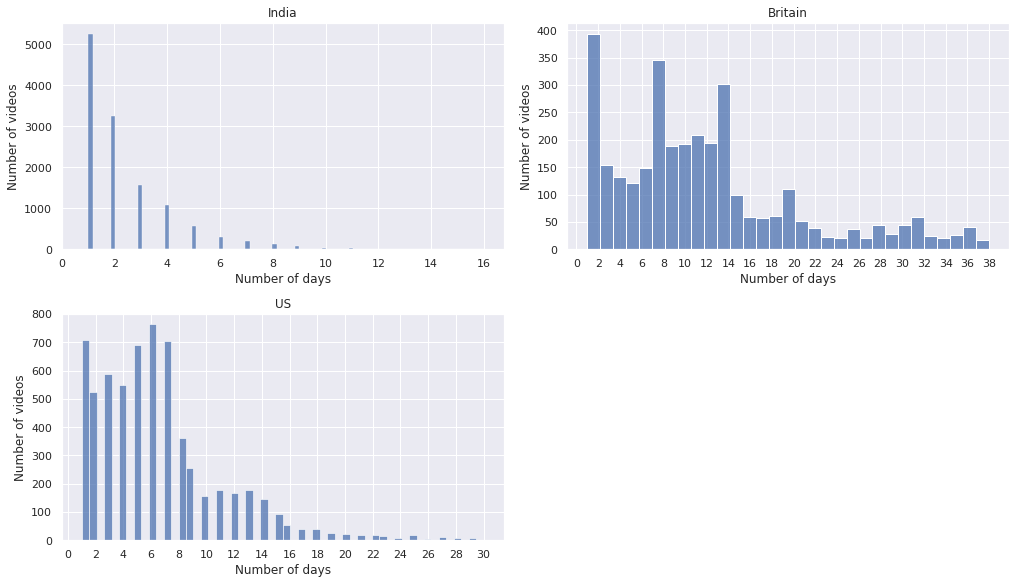

In [12]:
#to remove the distplot deprecated warning
import warnings
warnings.filterwarnings('ignore')

sns.set_theme()
fig,ax = plt.subplots(2,2,figsize=(14,8),constrained_layout=True)
for i,(df,country) in enumerate(zip(dfs,countries)):
    freq_df = df[['video_id','title','channel_title']]
    freq_df['counter'] = 1
    freq_df = freq_df.groupby('video_id',as_index=False).sum().sort_values(by = 'counter',ascending=False)

    #the most frequent one comes out to be the entries for which id is not available hence, removing that entry
    # id is #NAME?
    freq_df = freq_df.drop(axis=1,index=[0])
    #print(freq_df)
    
    sns.histplot(freq_df['counter'],ax=ax[i//2][i%2])
    ax[i//2][i%2].set_xlabel("Number of days")
    ax[i//2][i%2].set_ylabel("Number of videos")
    ax[i//2][i%2].set_xticks(range(0,max(freq_df['counter'])+1,2))
    ax[i//2][i%2].set_title(country)
    
plt.delaxes(ax=ax[1,1])
extent = ax[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('results/days_trending.png')
plt.show()

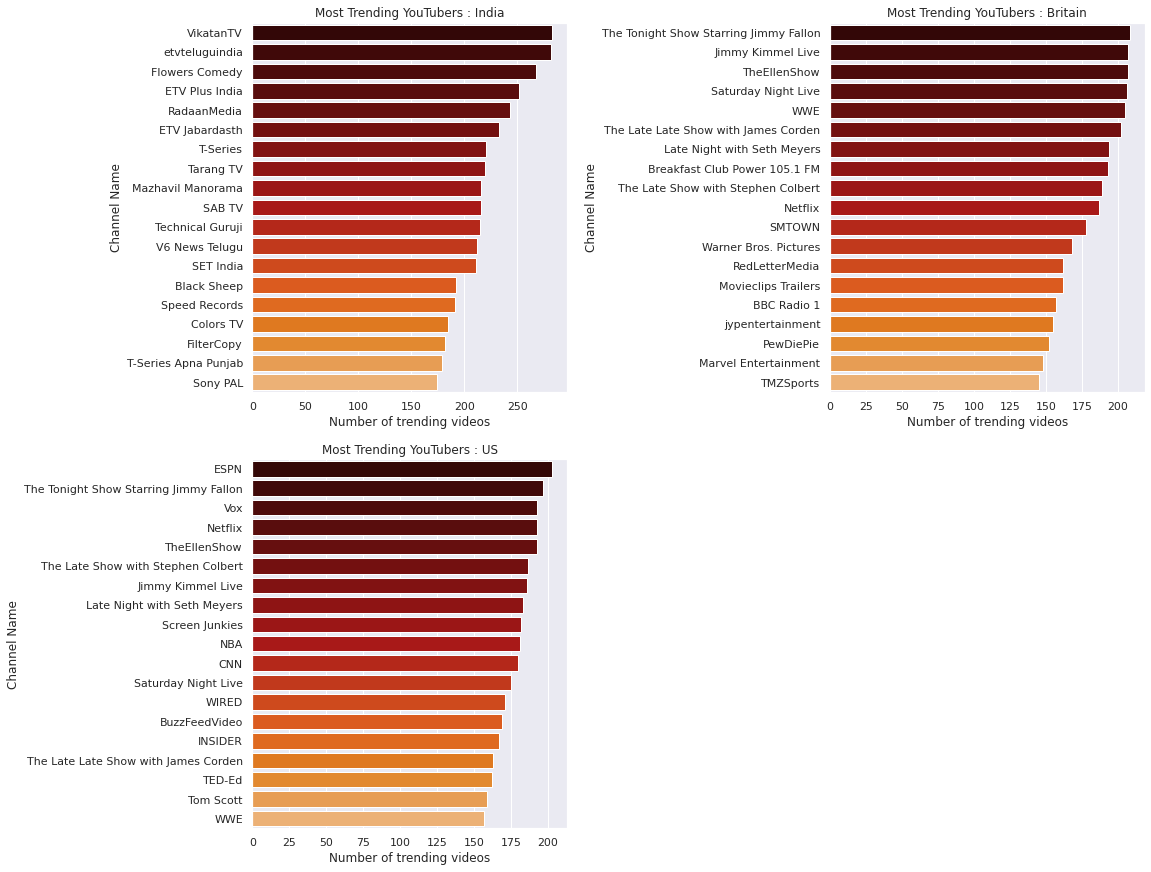

In [13]:
# channels with most trending videos

fig,ax = plt.subplots(2,2,figsize=(16,12),constrained_layout=True)

for i,(df,country) in enumerate(zip(dfs,countries)):
    tdf = df.groupby("channel_title").size().reset_index(name="video_count") \
        .sort_values("video_count", ascending=False).head(19)
    sns.barplot(x="video_count", y="channel_title", data=tdf,
                palette=sns.color_palette('gist_heat', n_colors=25)[3:],ax=ax[i//2][i%2]);
    ax[i//2][i%2].set_title("Most Trending YouTubers : "+country)
    ax[i//2][i%2].set_xlabel("Number of trending videos")
    ax[i//2][i%2].set_ylabel("Channel Name")
    
    
extent = ax[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('results/trending_channels.png')
plt.delaxes(ax=ax[1,1])
plt.show()

In [14]:
import json

with open('categories.json') as f:
    categoriesIN = json.load(f)
with open('GB_category_id.json') as f:
    categoriesGB = json.load(f)
with open('US_category_id.json') as f:
    categoriesUS = json.load(f)

In [15]:
cat_mapIN={}
cat_mapGB={}
cat_mapUS={}
for cat in categoriesIN["items"]:
    cat_mapIN[cat["id"]]=cat["snippet"]["title"]
for cat in categoriesGB["items"]:
    cat_mapGB[cat["id"]]=cat["snippet"]["title"]
for cat in categoriesUS["items"]:
    cat_mapUS[cat["id"]]=cat["snippet"]["title"]

In [16]:
def get_catIN(n):
    try:
        return cat_mapIN[str(n)]
    except:
        return "Other"
    
def get_catGB(n):
    try:
        return cat_mapGB[str(n)]
    except:
        return "Other"
    
def get_catUS(n):
    try:
        return cat_mapUS[str(n)]
    except:
        return "Other"

In [17]:
dfIN["category_id"]=dfIN["category_id"].apply(get_catIN)
dfGB["category_id"]=dfGB["category_id"].apply(get_catGB)
dfUS["category_id"]=dfUS["category_id"].apply(get_catUS)

In [18]:
display(dfIN.loc[dfIN['category_id']!='Other'])

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,trend_date,trend_month,trend_year,pub_date,pub_month,pub_year,pub_hour,file_path
0,kzwfHumJyYc,sharri mann cute munda song teaser parmish ver...,Lokdhun Punjabi,Film & Animation,1096327,33966,798,882,False,False,False,present sharri mann latest punjabi song cute m...,11,14,17,12,11,17,12,https://raw.githubusercontent.com/sheelfshah/i...
1,zUZ1z7FwLc8,पीरियड्स के समय पेट पर पति करता ऐसा देखकर दंग ...,HJ NEWS,News & Politics,590101,735,904,0,True,False,False,पीरियड्स के समय पेट पर पति करता ऐसा देखकर दंग ...,11,14,17,13,11,17,5,https://raw.githubusercontent.com/sheelfshah/i...
2,10L1hZ9qa58,stylish star allu arjun chaysam wed recept tfpc,TFPC,Entertainment,473988,2011,243,149,False,False,False,watch stylish star allu arjun chaysam wed rece...,11,14,17,12,11,17,15,https://raw.githubusercontent.com/sheelfshah/i...
3,N1vE8iiEg64,eruma saani tamil vs english,Eruma Saani,Comedy,1242680,70353,1624,2684,False,False,False,video showcas differ peopl speak english tamil...,11,14,17,12,11,17,7,https://raw.githubusercontent.com/sheelfshah/i...
4,kJzGH0PVQHQ,samantha becam emot samantha naga chaithanya m...,Filmylooks,Entertainment,464015,492,293,66,False,False,False,samantha becam emot samantha naga chaithanya m...,11,14,17,13,11,17,1,https://raw.githubusercontent.com/sheelfshah/i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30093,iNHecA3PJCo,फेकू आशिक़ राजस्थान की सबसे शानदार कॉमेडी रमकु...,RDC Rajasthani,Comedy,214378,3291,404,196,False,False,False,prg music rdc rajasthani present फेकू आशिक़ ra...,6,14,18,13,6,18,8,https://raw.githubusercontent.com/sheelfshah/i...
30094,dpPmPbhcslM,seetha flower ep 364,Flowers TV,Entertainment,406828,1726,478,1428,False,False,False,flower r rahman showbook ticket httpsgoogluyaq...,6,14,18,13,6,18,11,https://raw.githubusercontent.com/sheelfshah/i...
30095,mV6aztP58f8,bhramanam episod 87 12 june 2018 mazhavil mano...,Mazhavil Manorama,Entertainment,386319,1216,453,697,False,False,False,subscrib mazhavil manorama daili entertain dos...,6,14,18,13,6,18,5,https://raw.githubusercontent.com/sheelfshah/i...
30096,qxqDNP1bDEw,nua bohu full ep 285 13th june 2018 odia seria...,Tarang TV,Entertainment,130263,698,115,65,False,False,False,nuabohu stori rustic villag girl want becom id...,6,14,18,13,6,18,15,https://raw.githubusercontent.com/sheelfshah/i...


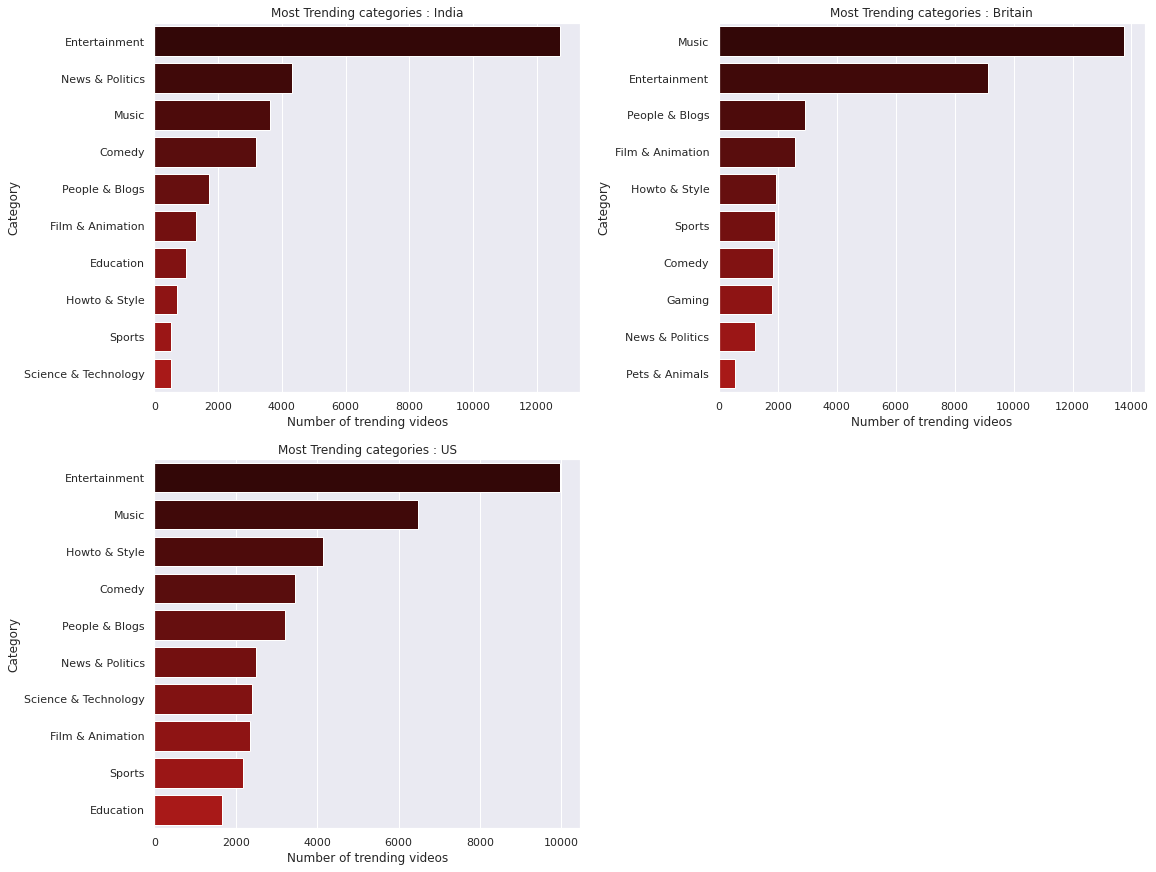

In [19]:
# categories with most trending videos
fig,ax = plt.subplots(2,2,figsize=(16,12),constrained_layout=True)

for i,(df,country) in enumerate(zip(dfs,countries)):
    tdf = df.groupby("category_id").size().reset_index(name="video_count") \
        .sort_values("video_count", ascending=False).head(10)
    sns.barplot(x="video_count", y="category_id", data=tdf,
                palette=sns.color_palette('gist_heat', n_colors=25)[3:],ax=ax[i//2][i%2]);
    ax[i//2][i%2].set_title("Most Trending categories : "+country)
    ax[i//2][i%2].set_xlabel("Number of trending videos")
    ax[i//2][i%2].set_ylabel("Category")
    
    
#extent = ax[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('results/trending_category.png')
plt.delaxes(ax=ax[1,1])
plt.show()

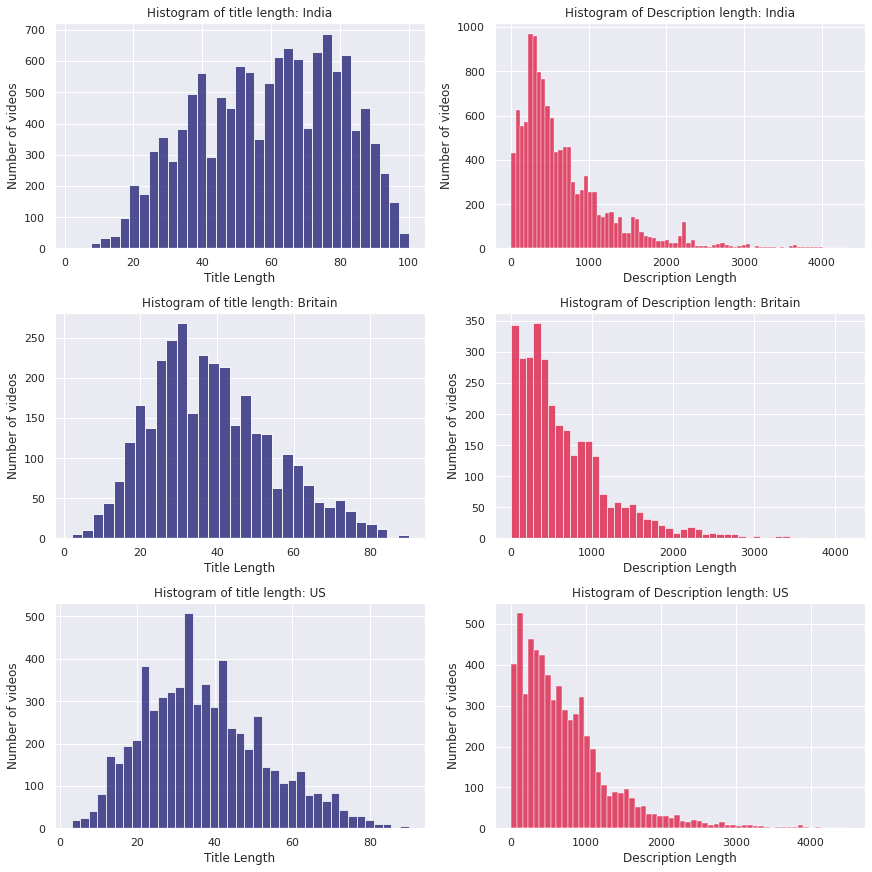

In [20]:

fig,ax = plt.subplots(3,2,figsize=(12,12),constrained_layout=True)

for i,(df,country) in enumerate(zip(dfs,countries)):
    tdf = df.sort_values('views',ignore_index=True)

    #only keeping the video with the max views
    tdf.drop_duplicates(subset = 'video_id',keep='last',inplace=True,ignore_index=True)
    tdf = tdf[['title','views','description']]
    tdf['description'] = tdf['description'].astype(str)
    tdf['title'] = tdf['title'].astype(str)
    tdf['title_length'] = 0
    tdf['descrip_length'] = 0
    for j,x in enumerate(tdf['title']):
        tdf.at[j,'title_length'] = len(tdf.at[j,'title'])
        tdf.at[j,'descrip_length'] = len(tdf.at[j,'description'])

    

    sns.histplot(tdf['title_length'],ax=ax[i][0],color='midnightblue')
    ax[i][0].set_xlabel('Title Length')
    ax[i][0].set_ylabel('Number of videos')
    ax[i][0].set_title('Histogram of title length: ' + country)
    sns.histplot(tdf['descrip_length'],ax=ax[i][1],color='crimson')
    ax[i][1].set_xlabel('Description Length')
    ax[i][1].set_ylabel('Number of videos')
    ax[i][1].set_title('Histogram of Description length: ' + country)
    
#extent = ax[0,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig('results/title_len.png')

plt.show()

In [21]:
for df in dfs:
    df["l_dl_ratio"]=df["likes"]/df["dislikes"]

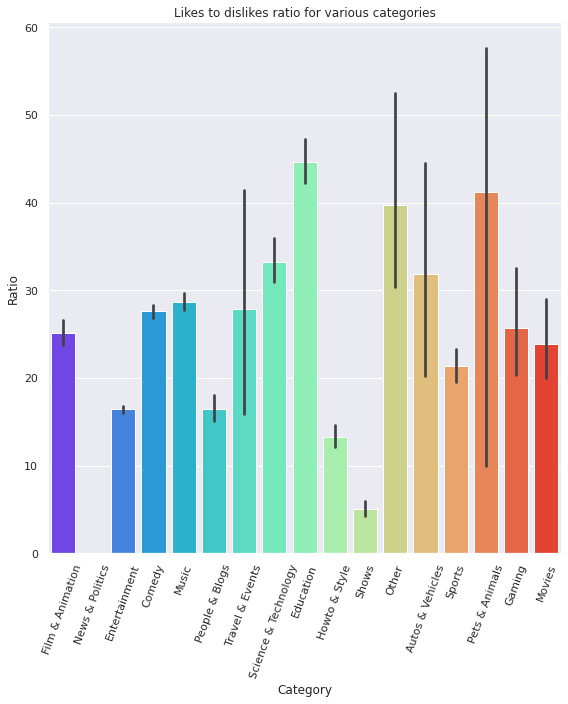

In [22]:
sns.set(rc={'figure.figsize':(15,15)})
sns.catplot(x="category_id", y="l_dl_ratio", kind = 'bar', data=dfIN, palette = "rainbow", height=8)
plt.xticks(rotation="70")
set_labels("Likes to dislikes ratio for various categories", "Category", "Ratio")
plt.savefig('results/likes_dis.png')
plt.show()

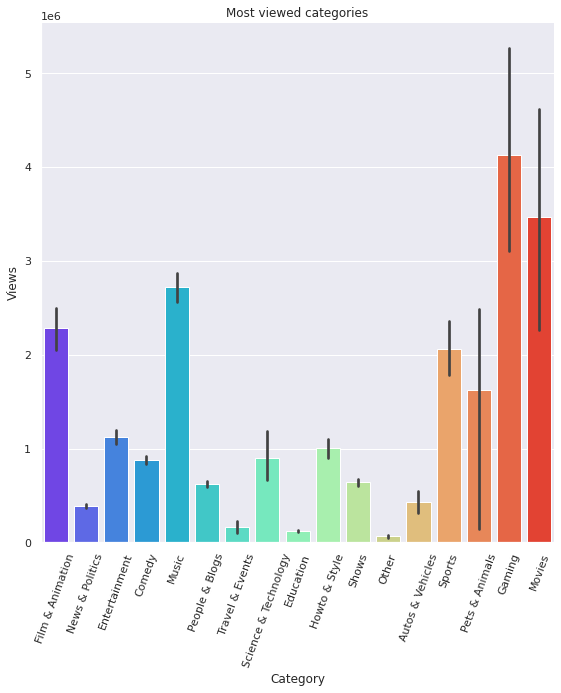

In [23]:
sns.set(rc={'figure.figsize':(15,15)})
sns.catplot(x="category_id", y="views", kind = 'bar', data=dfIN, palette = "rainbow", height=8)
plt.xticks(rotation="70")
set_labels("Most viewed categories", "Category", "Views")
plt.savefig('results/most_viewed_cat.png')
plt.show()

In [24]:
# we can see that not too many gaming videos are trending but they attract a lot of views